# Problem Set 1: Identifying top complaint type

In [33]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#load 311 data into a dataframe
data = r"311_Service_Requests.csv"
df = pd.read_csv(data)
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


The goal of this exercise is to find <b>which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?</b>

This is done by studying the 311 dataset from <a href="https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9">here</a>. 311 service is for New York citizens where citizens can report non-emergency requests from the city

In [35]:
# First analyse the different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
Unnamed: 0                int64
Unique Key                int64
Created Date              object
Closed Date               object
Complaint Type            object
Location Type             object
Incident Zip              float64
Incident Address          object
Street Name               object
Address Type              object
City                      object
Status                    object
Resolution Description    object
Borough                   object
Latitude                  float64
Longitude                 float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


Since this question calls for finding the most common complaint to study first, we ought to study the complaint type column

In [36]:
df["Complaint Type"].unique()
# df["Complaint Type"].isnull().sum() 
# This dataset doesn't have any null values, but this should be checked.

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'Unsanitary Condition', 'HPD Literature Request', 'HEATING',
       'PAINT - PLASTER', 'Safety', 'Electric', 'General', 'Appliance',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'Outside Building', 'Plumbing',
       'Mold'], dtype=object)

In [37]:
df["Complaint Type"].value_counts()

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Mold                            1
Electric      

We should note that 'Heating" and "Heat/Hot Water" is essentially the same due to a diplomatic change in semantics. Looking at the csv file, after a certain time, all complaints labeled 'Heating' were changed to 'Heat/Hot Water'. We can amalgamate the two using numpy to avoid confusion.

In [38]:
df['Complaint Type'] = np.where(df['Complaint Type']=='HEATING','HEAT/HOT WATER',df['Complaint Type'])
# Can check to make sure that 
# df['Complaint Type'].value_counts()

Clearly at this point, the data resoundingly supports focusing on complaints about <b>Heat/Hot Water</b>. We can conclude this altogether by summarizing it in a plot.

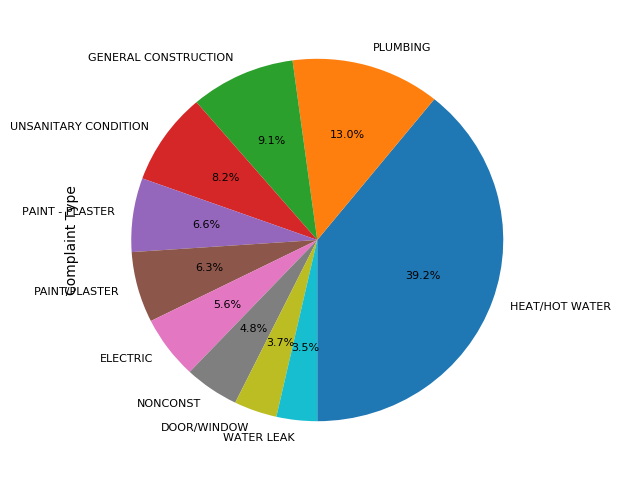

In [41]:
# Plotting complaint frequencies in a pie chart
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)

df["Complaint Type"].value_counts().head(10).plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=8)
plt.show()

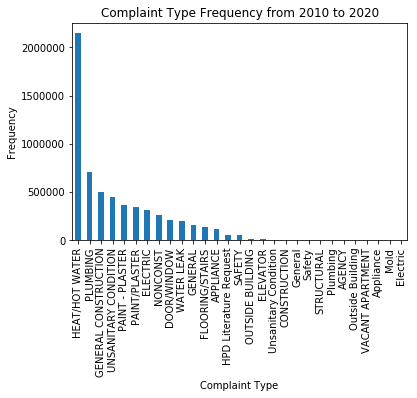

In [40]:
# Plotting complaint frequencies in a bar chart
df["Complaint Type"].value_counts().plot(kind='bar')
plt.xlabel('Complaint Type') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('Complaint Type Frequency from 2010 to 2020') # add title to the plot
plt.show()

## Conclusion: The Department of Housing Preservation and Development of New York City should focus on all Heating or Heat/Hot Water complaints as it accounts for 35.7% of all complaints registered and ultimately the most prominent request.